In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd

In [19]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [23]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
hm = Base.classes.measurement
hs = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [26]:
first_row = session.query(hm).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x173bd9ee940>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [27]:
first_row = session.query(hs).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x173bda6d700>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168}

In [28]:
session.query(hm.date).order_by(hm.date.desc()).first()

('2017-08-23')

# Exploratory Climate Analysis

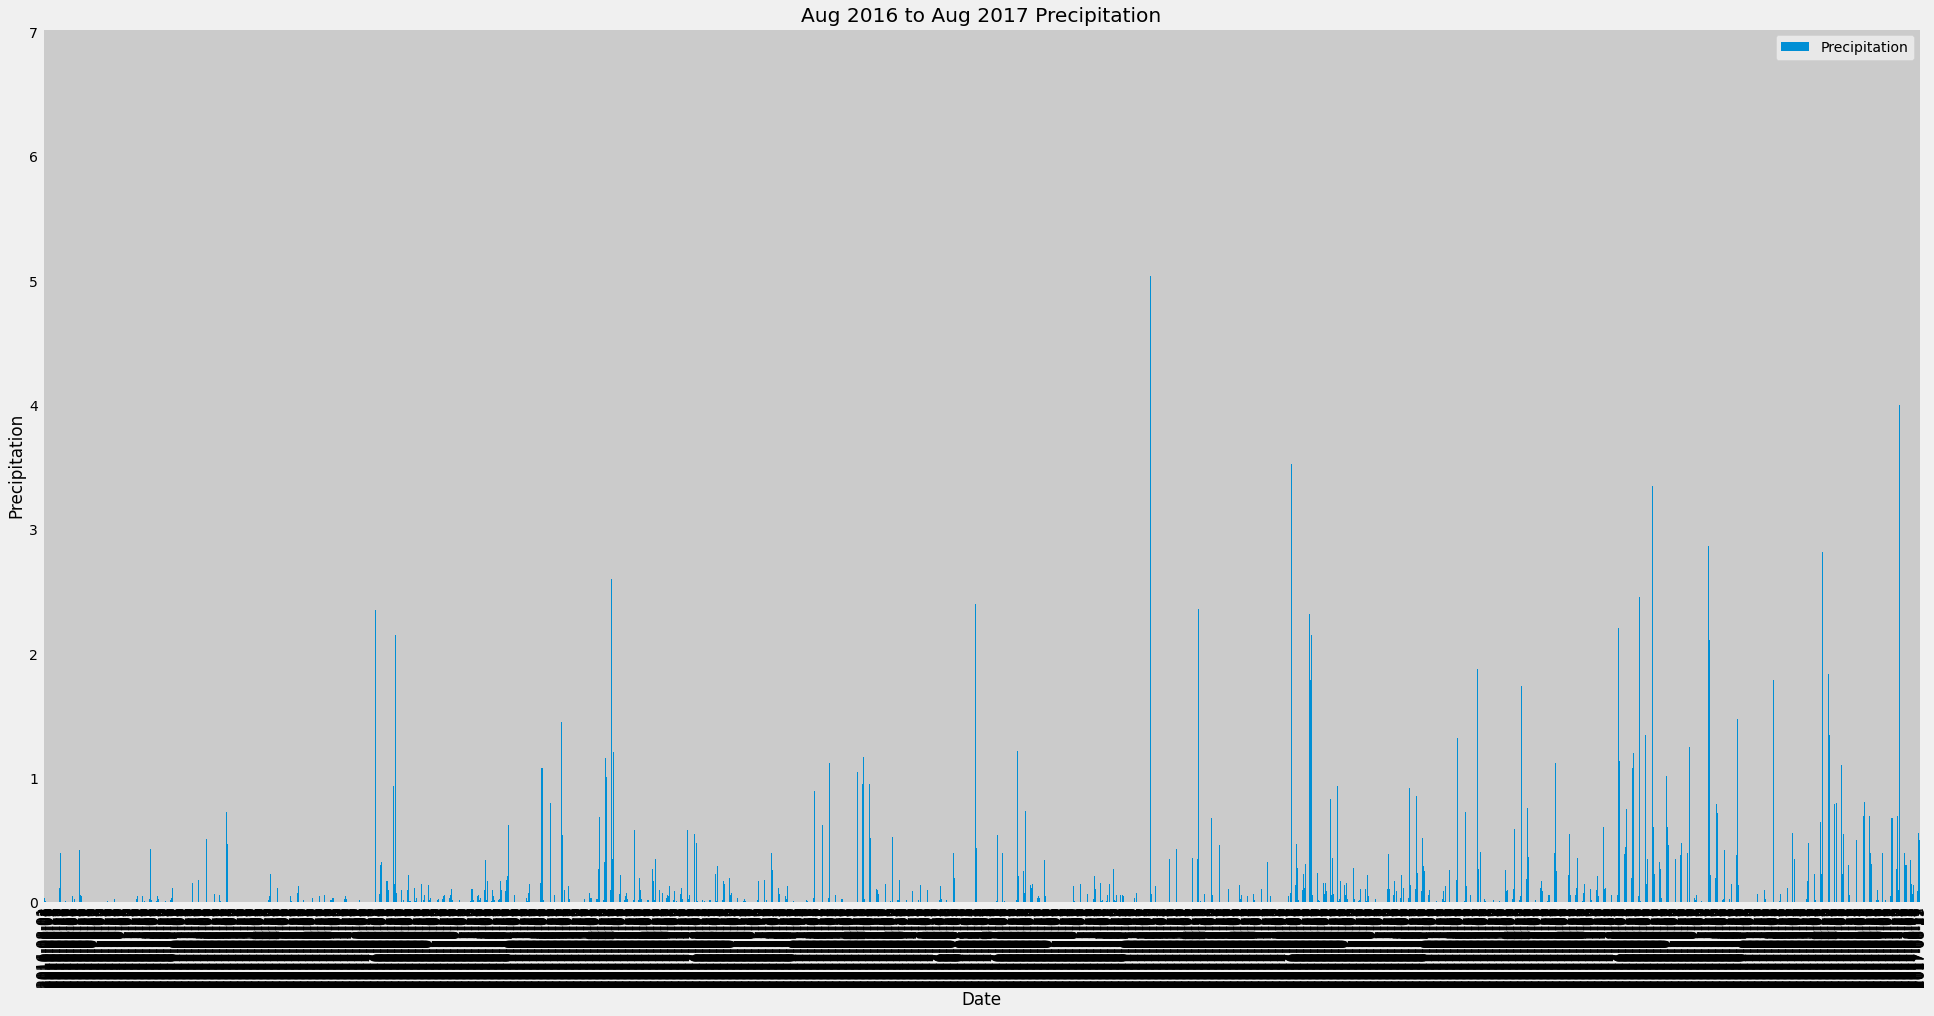

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_1 = session.query(hm.date,hm.prcp).filter(hm.date >= '2016-08-01').all()

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

data_prcp = pd.DataFrame(prcp_1, columns=['Date', 'Precipitation'])
#data_prcp.set_index('Date')
data_prcp_clean = data_prcp.dropna()
data_prcp_clean.head()

# Sort the dataframe by date
data_prcp_clean.sort_index(axis = 0, ascending=True)
data_prcp_clean.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
#plt = data_prcp_clean['Date'].tolist()

ax = data_prcp_clean.plot.bar(x='Date', y='Precipitation', figsize=(30,15), ylabel = 'Precipitation', xlabel='Date', title='Aug 2016 to Aug 2017 Precipitation')


In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_prcp_clean.describe()

,Precipitation
count,2148.000000
mean,0.182896
std,0.467339
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


In [71]:
# Design a query to show how many stations are available in this dataset?
#session.query(hm.station).order_by(hm.station.desc()).distinct().all()
session.query(func.count((hm.station).distinct())).all()

[(9)]

In [106]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = session.query(hm.station,hm.prcp).all()
stations_pd = pd.DataFrame(stations, columns=['Station','Precipitation'])
stations_pd1 = stations_pd.dropna()
stations_pd1.groupby('Station').count().sort_values('Precipitation', ascending=False)
#stations_pd.shape

,Precipitation
Station,
USC00519281,2772
USC00513117,2696
USC00519397,2685
USC00519523,2572
USC00516128,2484
USC00514830,1937
USC00511918,1932
USC00517948,683
USC00518838,342


In [132]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
max_temp = session.query(func.max(hm.tobs).filter(hm.station == 'USC00519281')).all()
min_temp = session.query(func.min(hm.tobs).filter(hm.station == 'USC00519281')).all()
avg_temp = session.query(func.avg(hm.tobs).filter(hm.station == 'USC00519281')).all()
print(f"max temp = {max_temp} min temp = {min_temp} average temp = {avg_temp}")

max temp = [(85.0,)] min temp = [(54.0,)] average temp = [(71.66378066378067,)]


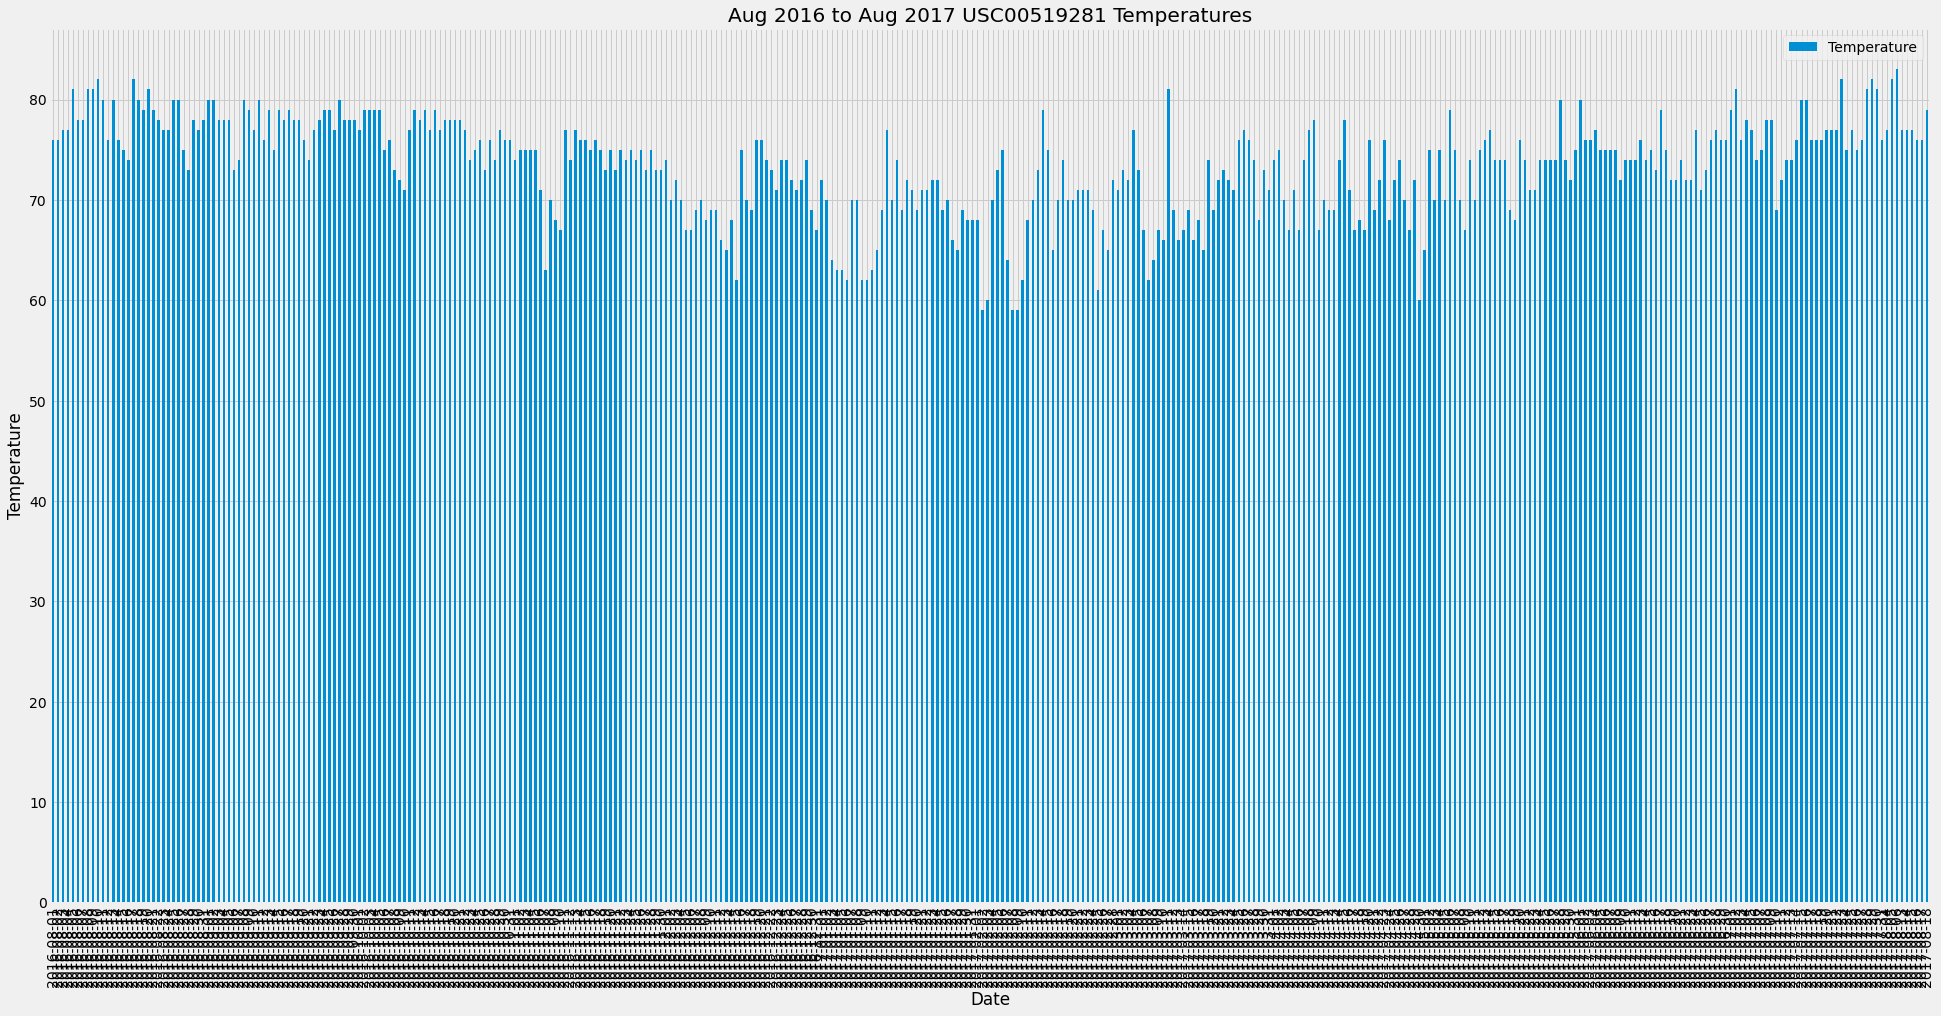

In [141]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stations = session.query(hm.station,hm.tobs).all()
stations_pd = pd.DataFrame(stations, columns=['Station','Temperature'])
stations_pd1 = stations_pd.dropna()
stations_pd1.groupby('Station').count().sort_values('Temperature', ascending=False)

temps = session.query(hm.date,hm.tobs).filter(hm.station == 'USC00519281').filter(hm.date >= '2016-08-01').all()
temps_df = pd.DataFrame(temps, columns=['Date', 'Temperature'])

ax = temps_df.plot.bar(x='Date', y='Temperature', figsize=(30,15), ylabel = 'Temperature', xlabel='Date', title='Aug 2016 to Aug 2017 USC00519281 Temperatures')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
